# Triple Exponential Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"C:\Users\User\Desktop\Python Code\Time Series - IMS Student\Python\ES Model\AirPassenger.csv")
data.head(3)

,Date,Passenger
0,01-01-1949,112
1,01-02-1949,118
2,01-03-1949,132


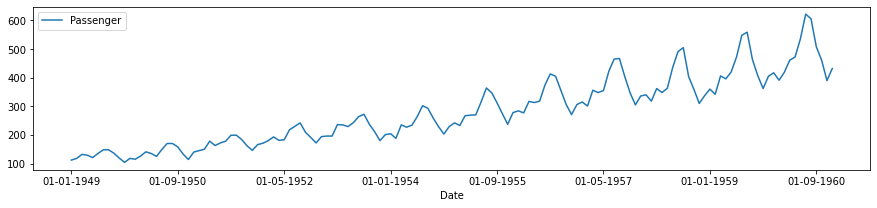

In [12]:
data.plot.line(x = 'Date',y = 'Passenger',figsize=(15,3))
plt.show()  # Trend , Seasonal

In [13]:
data2=data.set_index("Date")
data2.head()

,Passenger
Date,
01-01-1949,112
01-02-1949,118
01-03-1949,132
01-04-1949,129
01-05-1949,121


abc=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93])

#### Auto Model

In [14]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params
          # initial_seasons=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93]))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.3185712888052198,
 'smoothing_trend': 7.379190200108172e-08,
 'smoothing_seasonal': 0.6013396325425482,
 'damping_trend': nan,
 'initial_level': 101.55250809004671,
 'initial_trend': 2.3875711427949673,
 'initial_seasons': array([1.07196828, 1.12735426, 1.24489843, 1.18754982, 1.10861881,
        1.21068263, 1.31649143, 1.30032888, 1.18552662, 1.03418286,
        0.91581163, 1.04889856]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [15]:
model2.fittedvalues

Date
01-01-1949    111.420468
01-02-1949    120.063091
01-03-1949    134.828045
01-04-1949    130.592864
01-05-1949    124.086146
                 ...    
01-08-1960    625.007594
01-09-1960    506.744324
01-10-1960    443.212898
01-11-1960    393.493280
01-12-1960    432.350878
Length: 144, dtype: float64

In [16]:
df = pd.DataFrame(
    np.c_[data.Passenger, model2.level, model2.trend, model2.season,model2.fittedvalues],
    columns=["Actual","Level","Trend","Seasonal","Forecast"])
df

,Actual,Level,Trend,Seasonal,Forecast
0,112.0,104.112307,2.387571,1.075321,111.420468
1,118.0,105.916883,2.387571,1.115705,120.063091
2,132.0,107.580753,2.387571,1.229196,134.828045
3,129.0,109.541024,2.387571,1.178840,130.592864
4,121.0,111.041764,2.387571,1.092038,124.086146
...,...,...,...,...,...
139,606.0,426.086885,2.387570,1.426078,625.007594
140,508.0,428.812692,2.387570,1.184433,506.744324
141,461.0,436.713141,2.387571,1.052664,443.212898
142,390.0,437.858869,2.387571,0.891350,393.493280


### Future Forecast 

In [17]:
Forecast2 = model2.forecast(24)
Forecast2

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


144    445.242333
145    418.225186
146    465.309856
147    494.949810
148    505.474927
149    573.311672
150    663.594586
151    654.902239
152    546.758993
153    488.444854
154    415.722208
155    460.376111
156    474.069426
157    445.157750
158    495.114599
159    526.484770
160    537.510388
161    609.455528
162    705.211596
163    695.760579
164    580.694012
165    518.604571
166    441.260157
167    488.513124
dtype: float64

#### Forecast Plot

<AxesSubplot:xlabel='Date'>

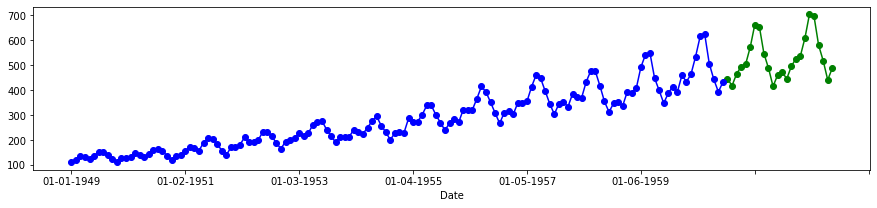

In [18]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [19]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,Passenger,Forecast
Date,,
01-01-1949,112,111.420468
01-02-1949,118,120.063091
01-03-1949,132,134.828045
01-04-1949,129,130.592864
01-05-1949,121,124.086146


#### Accuracy of Model

In [20]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Passenger - data2.Forecast)/np.abs(data2.Passenger))*100
mean_absolute_percentage_error

3.0838856202641414

# Finished 